# First pre-proccesing mean and std values
#Kaggle Train data
For all channels------------------------------------

Amount of images: 35120.0
Amount of pixels: 27619491840.0

Mean: 100.341076541
stdDeviation = 84.3462875563

By channel------------------------------------

Mean R: 100.009405273
Mean G: 100.227072634
Mean B: 100.786751717

std R: 84.3177751745
std G: 84.2576168412
std B: 84.4614340298


PD: THIS IMAGES ARE FROM THE OLD KIND OF PRE PROCCESING AND DOESNT EXCIST ANY MORE

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import cv2
import cv2.cv as cv
import math
import os
import retinaMethods as rm
from datetime import datetime


path = '/home/maria.alvarez/mountedData/numpyArrImages/' # few of kaggle
all_names = [f for f in os.listdir(path) if not f.startswith('l')] # os.listdir(path)
rm.sort_nicely(all_names)  

amount = 0.0
r = c = 512
layer = 3

all_names

#all_names=all_names[0:2]

#Find amount of images  
for filename in all_names: 
    filePath = os.path.join(path, filename)
    array = np.load(filePath) 
    #acumulation
    imgs,_, _,_ = array.shape
    amount += imgs
    

N_pix = r*c*amount

print("Amount of images:" , amount) 
print("Amount of pixels:", N_pix)    

Amount of images: 35120.0
Amount of pixels: 9206497280.0


In [7]:
#Mean calculation

mean_R = 0.0
mean_G = 0.0
mean_B = 0.0


for filename in all_names: 
    filePath = os.path.join(path, filename)
    array = np.load(filePath) 
    #print(array.shape)
    #Mean
    #mean += np.sum(array)/N_pix
    mean_R += np.sum(array[:,0,:,:])/N_pix
    mean_G += np.sum(array[:,1,:,:])/N_pix
    mean_B += np.sum(array[:,2,:,:])/N_pix

    
    
print("Mean R:" , mean_R) 
print("Mean G:" , mean_G) 
print("Mean B:" , mean_B) 


Mean: 100.009405273
Mean: 100.227072634
Mean: 100.786751717


In [ ]:
#Read all the images, subtract mean and save them
for filename in all_names: 
    filePath = os.path.join(path, filename)
    array = np.load(filePath) 
    #Mean substract
    centered = array - mean
    #Save the array with the zero-centered data
    #np.save(filePath, centered)
    
 

In [10]:
#Normalize data
acumNorm_R = 0.0
acumNorm_G = 0.0
acumNorm_B = 0.0

for filename in all_names: 
    filePath = os.path.join(path, filename)
    array = np.load(filePath) 
    #Square each element of the array and sum them
    centered_R = array[:,0,:,:] - mean_R
    centered_G = array[:,1,:,:] - mean_G
    centered_B = array[:,2,:,:] - mean_B

    acumNorm_R += np.sum(np.square(centered_R))/N_pix
    acumNorm_G += np.sum(np.square(centered_G))/N_pix
    acumNorm_B += np.sum(np.square(centered_B))/N_pix


std_R = math.sqrt(acumNorm_R)      
std_G = math.sqrt(acumNorm_G)      
std_B = math.sqrt(acumNorm_B)   

print("std R:" , std_R) 
print("std G:" , std_G) 
print("std B:" , std_B) 



std R: 84.3177751745
std G: 84.2576168412
std B: 84.4614340298


In [ ]:
#Read all the images, divide for the std and save them
for filename in all_names: 
    filePath = os.path.join(path, filename)
    array = np.load(filePath) 
    #std division
    normalized = array/std
    #Save the array with the normalized data
    #np.save(filePath, normalized)


In [ ]:
#------------------------------------------------------------------------------------------------

In [ ]:
512*512*3*35126.0

In [ ]:
filePath = os.path.join(path, all_names[0])
array = np.load(filePath)
print(array.shape)

 

print(np.mean(array))

print(np.sum(array))


mn = np.sum(array)/(512*512*3*100)
print(mn)


In [ ]:
cnt = array - mn
aN = np.sum(np.square(cnt))
stdev = math.sqrt(aN/(r*c*layer*100))
stdev

In [ ]:
np.std(cnt)

In [ ]:
np.square(array)

np.array([49, 51, 53, 56]) - 3

math.sqrt(9)

np.array([49, 51, 53, 56]) /2.5

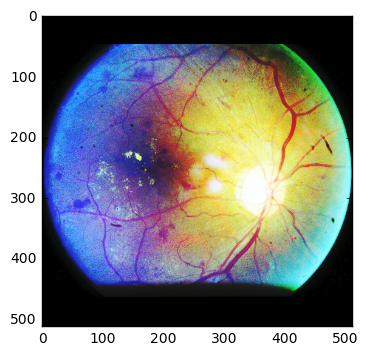

In [38]:
path = '/home/maria.alvarez/mountedData/numpyArrImages/' # few of kaggle
filePath = os.path.join(path, 'images_11.npy')
array = np.load(filePath)
labels = np.load(os.path.join(path, 'labels_11.npy'))

# print(array.shape)
# array = np.rollaxis(array,1,4)
# print(array.shape)

amIm = 10
offset= 10

for i in xrange(array.shape[0]):
    imgg = array[i,:,:,:]
    #print(imgg.shape)
    imgg4 = np.rollaxis(imgg,0,3) #Roll axis to had the form RxCxL
    #print(imgg4.shape)
    
    if labels[i]==4:  

        plt.imshow(imgg4)
        #plt.xticks([]),plt.yticks([])
        plt.show()

In [29]:

labelsNum = labels

prob = []

for k in range(5):
    print(np.sum(labelsNum==k)/float(labelsNum.size)*100)
    prob.append(np.sum(labelsNum==k)/float(labelsNum.size))
    


70.0
9.0
15.0
5.0
1.0
